# Bayesian Inference with Gaussian Posterior
**Objective:** Estimate posterior distribution for mean of Gaussian data with known variance

### Theoretical Background
- **Likelihood:** 
  $$
  p(x|\mu) = \mathcal{N}(\mu, \sigma^2) \quad (\sigma^2 \text{ known})
  $$
- **Conjugate Prior:**
  $$
  p(\mu) = \mathcal{N}(\mu_0, \sigma_0^2)
  $$
- **Posterior:**
  $$
  p(\mu|x_1,\ldots,x_n) = \mathcal{N}(\mu_n, \sigma_n^2)
  $$
  where
  $$
  \mu_n = \frac{\frac{n}{\sigma^2}\bar{x} + \frac{1}{\sigma_0^2}\mu_0}{\frac{n}{\sigma^2} + \frac{1}{\sigma_0^2}}, \quad
  \sigma_n^{-2} = \frac{n}{\sigma^2} + \frac{1}{\sigma_0^2}
  $$

## 1. Import Required Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(42)

## 2. Generate Synthetic Data

### True Parameters:
- μ_true = 5.0 (unknown to us)
- σ = 2.0 (known)

In [2]:
# True parameters
mu_true = 5.0
sigma = 2.0

# Generate data
n_samples = 50
data = np.random.normal(mu_true, sigma, n_samples)

## 3. Bayesian Inference Implementation

In [3]:
def gaussian_posterior(data, sigma, mu_0, sigma_0):
    """
    Compute posterior parameters for Gaussian conjugate model
    
    Parameters:
    data : array-like of observed data
    sigma : known standard deviation
    mu_0 : prior mean
    sigma_0 : prior standard deviation
    
    Returns:
    (mu_n, sigma_n) : posterior parameters
    """
    n = len(data)
    sigma_sq = sigma**2
    sigma_0_sq = sigma_0**2
    
    # Posterior precision
    precision_n = (n/sigma_sq) + (1/sigma_0_sq)
    
    # Posterior mean
    mu_n = ((np.sum(data)/sigma_sq) + (mu_0/sigma_0_sq)) / precision_n
    
    # Posterior standard deviation
    sigma_n = 1/np.sqrt(precision_n)
    
    return mu_n, sigma_n

## 4. Prior/Posterior Visualization

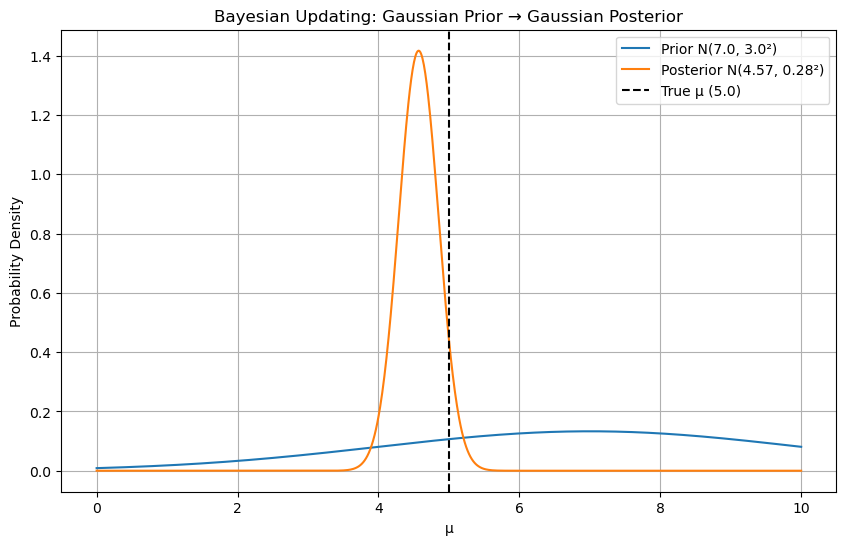

In [4]:
# Prior parameters
mu_0 = 7.0  # Prior mean
sigma_0 = 3.0  # Prior std dev

# Compute posterior
mu_n, sigma_n = gaussian_posterior(data, sigma, mu_0, sigma_0)

# Plotting
x = np.linspace(0, 10, 1000)
plt.figure(figsize=(10,6))

# Plot prior
plt.plot(x, norm.pdf(x, mu_0, sigma_0), 
         label=f'Prior N({mu_0}, {sigma_0:.1f}²)')

# Plot posterior
plt.plot(x, norm.pdf(x, mu_n, sigma_n),
         label=f'Posterior N({mu_n:.2f}, {sigma_n:.2f}²)')

# Plot true mean
plt.axvline(mu_true, color='black', linestyle='--', 
            label=f'True μ ({mu_true})')

plt.title('Bayesian Updating: Gaussian Prior → Gaussian Posterior')
plt.xlabel('μ')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

## 5. Exercise Questions

**Q1.** Try different prior parameters:
- What happens when you use a very strong prior (small σ₀)?
- What happens with a very weak prior (large σ₀)?

**Q2.** Data quantity impact:
- Rerun with n_samples = 5 and n_samples = 500
- How does posterior change? Compare to MLE estimate

**Q3.** Credible intervals:
- Compute 95% credible interval from posterior
- Does it contain the true mean?

**Advanced (Optional):**
- Implement predictive distribution for new observations
- Add interactive widgets for prior parameters